<a href="https://colab.research.google.com/github/Fiv3286/DF2-ddos/blob/main/DF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Investigation of the ddos attack
project group 7

# Motivation and Goals
In this short paper we will look at a ddos attack performed on a local network and analyze the recorded data. In this case we are looking at a ddos attack that was performed for research purposes, but it is important to analyze this attack so that we can better prepare ourselves for a real malicious attack in the future. Therefore the goal of this analysis is to find characteristic aspects of the malicious traffic in this attack so that we can recognize similar ddos attacks more easily in the future.

# Methodology
The data we will be analyzing is a capture file of the victims incoming and outgoing data traffic. This data was captured using Wireshark and we will also analyze this data using Wireshark. We will first look at all the captured data and later on focus more on the traffic solely related to the attack.
In the analysis we will look at individual traffic packets to analyze the traffic but also apply filters to separate the normal traffic from the malicious traffic and get a better understanding of the characteristics of the malicious traffic.


# Results
When looking at the results we can see a clear footprint of the attack in total data. The malicious traffic can be characterized by all packets part of the attack having a length of either 66. 74, 78 or 86 bytes. All malicious packets are also TCP all going to port 80 only on the victims device.
When looking more in depth at how the malicious traffic was sent by the attackers we can see that each attacker used thousands of different ports with each port only sending between 1 and 5 packets. We can also see that the total amount of data send in this ddos attack was very small with the total amount of data only being around 38 Mb being send over a timespan of more than 70 seconds.

1.	There are 620304 packets in the trace.
2.	The entire trace lasted 90.174052 seconds.
3.	Picture1.png  
Packet 32 is an ICMP ping from 192.168.0.2 responding to a ICMP ping which 192.168.0.100 sent in packet 31.
Packet 33 is an ARP request from 192.168.0.101 to everyone on the network asking if 192.168.0.1 is used and who has it.
Packet 34 is a MDNS response telling all the devices on the network that 192.168.0.111 has the hostname “Haidau’s MacBook Air”.
4.	The destination IP is always 192.168.0.100, the protocol is always TCP, the destination port is always port 80 and the packet length is always either 66, 74, 78 or 86.
5.	 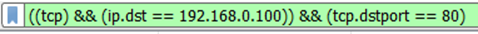
6.	The target of the attack is 192.168.0.100.
7.	There are a total of 308033 packets part of the attack.
8.	The attack is performed by a total of 15 attackers.
9.	The following three IP addresses were the top three attackers with the most packets send.
 1. 192.168.0.117 which sent 42.845 packets.
 2. 192.168.0.104 which sent 31.431 packets.
 3. 192.168.0.107 which sent 30.389 packets.
10. In the pie chart below we can see the distribution of the venods of the devices used in the attack.

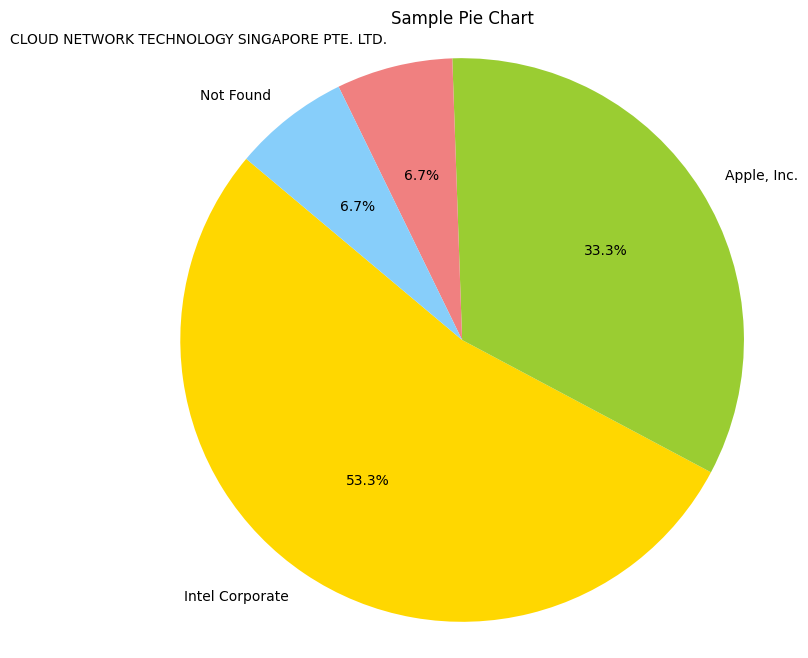

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Intel Corporate', 'Apple, Inc.', 'CLOUD NETWORK TECHNOLOGY SINGAPORE PTE. LTD.', 'Not Found']
sizes = [8, 5, 1, 1]  # Values for each section of the pie chart
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']  # Colors for each section

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the size of the figure
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)  # autopct shows the percentage on the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sample Pie Chart')  # Optional: Set the title of the chart

# Display the chart
plt.show()


11.	The destination port in the attack is always port 80, whereas the used source ports from the attackers were thousands of different ports. And from each of these ports only anywhere from 1-5 packages were sent. For example, 19.168.0.117, which was the largest attacker, used ports 15364-35462 to send packages.
12.	These packets are responses to the unexpected TCP requests from the attacker and are the response of the victim telling the attacker to close the TCP connection.
13.	The attack could have been more successful if the attackers instead of attacking the target themselves with requests, they send requests to a DNS server spoofing as the victim and performed a DNS flood. Another way they could have made the attack more successful would be if more devices took part in the attack, thus sending more traffic to the victim.
14.	At the data peak of the attack, the attackers send 6.913 Mbit/s.
15.	The flags are clustered through the packet data, with at the beginning of the recording the clusters being a bit smaller but a second into the attack, the TCP packets and the flagged TCP RST packets clustered in larger groups. This is because the TCP packets are being send in so fast that the receiving device is not able to send out a response for for the first packet before another packet already arrives.
16.	The packets in the attack have 4 different sizes; 66, 74, 78 and 86. Here packet sizes 66, 74 and 78 make up 92.89% of the packets send in the attack and packet size 86 makes up 7.11%. The TCP RST packets that the target sends back all have a size of 54 bytes.
17.	192.168.0.117 sent the most packets in the attack, with a total of 42.847 packets having a total size of 2,93 Mbytes. These packets were send over a timespan of 74,732 seconds meaning they send an average of 573 packets per second.
Whereas the second largest attacker send a total of 31.434 packets in a timespan of 72.743 seconds meaning they send an average of 432 packets per second.

# Conclusions and Reflections
Concluding we find a number of characteristics of the attack where package length probably is easiest to block incoming traffic on to later protect ourselves to similar ddos attacks. Other characteristics of this attack were packet type and port number of the victim. With these characteristics we were able to filter all natural traffic out and only be left with malicious traffic.
When reflecting on this analysis, we have to take into account that the found characteristics are only valid for attacks using the same software for the attack. Thus we have to realize that the found characteristics may be completely different for other ddos attacks.
However, something that we probably can take away for most other ddos attacks as well, is that the malicious packets are restricted to a limited set of package lengths.
